![title](img/EPL.jpg)

# Part 1: Introduction

## Project and Background

In this mini-project our goal will be predicting the football matches based on the teams' past performance. Given i set of features, we need to predict the "Full Time Result" of each specific game. 

A quick introduction on football match:
1. Each team has a location where it practices during the season and where it hosts games. When a team is serving as host of a contest, it is designated as the "home team". The opposing team is said to be the "away team".
2. EPL,  referred to the English Premier League, is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation. The best four teams are promoted to the UEFA Champions League .The worst-ranked teams are relegated to the lower division for the next season. That's the reason why for each season the clubs are slightly different.

## Why English Premier League 

EPL is the most exciting and popular football league around the world. The level of the teams is relatively average, so the competition for the championship is more intense, making the outcome of the game harder to predict. For example, Leicester were confirmed as champions of the 2015–16 Premier League season, finishing top of England's highest league for the first time in the club's history. The club was 5000-1 with bookmakers to win the division before the season kicked off. This is one of the greatest sporting stories of all time.

# Part 2: Dataset & Data Profiling

Retrived dataset from http://football-data.co.uk/data.php   
EPLS: https://github.com/rsibi/epl-prediction-2017 (EPL prediction)  
Other reference: https://github.com/llSourcell/Predicting_Winning_Teams/blob/master/Prediction.ipynb  
kaggle: https://www.kaggle.com/airback/match-outcome-prediction-in-football  

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [2]:
dataset = pd.read_csv('dataset.csv')
match_predict = pd.read_csv('X_predictions.csv')

In [19]:
# Calculate win rate, lose rate and draw rate for home team.

n_match = dataset.shape[0]
win_rate = (float(len(dataset[dataset.FTR == 'H']))) / (n_match) * 100
draw_rate = (float(len(dataset[dataset.FTR == 'D']))) / (n_match) * 100
lose_rate = (float(len(dataset[dataset.FTR == "A"]))) / (n_match) * 100

# Print the results
print("Win rate of home team: {:.2f}%".format(win_rate))
print("Draw rate of home team: {:.2f}%".format(draw_rate))
print("Lose rate of home team: {:.2f}%".format(lose_rate))

Win rate of home team: 44.78%
Draw rate of home team: 23.78%
Lose rate of home team: 31.43%


## Features and Variable 

In [3]:
X_all = dataset[['HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5', 'HomeTeamLP', 'AwayTeamLP']]
y_all = dataset['FTR']
X_predictions = match_predict[['HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5', 'HomeTeamLP', 'AwayTeamLP']]

### Features

The features chosen are the following:
1. Most recent 5 games that HomeTeam and AwayTeam played (HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5)
2. Past 5 historical confrontations between HomeTeam and AwayTeam (past_confrontations_1-past_confrontations_5)
3. Last year's ranking (No.1 to No.20)

In [21]:
print(X_all['HM1'].unique())
print(X_all['past_confrontations_1'].unique())

['M' 'W' 'D' 'L']
['M' 'D' 'A' 'H']


M: Missing W:Win D:Draw L:Lose  
M: Missing   D:Draw,   A: AwayTeam wins   H: HomeTeam wins

### Variables

In [23]:
y_all.unique() # multiclass classification problem

array(['A', 'D', 'H'], dtype=object)

## Process the categorical features

In [4]:
# Converting the categorical features to dummy variables
from sklearn.preprocessing import OneHotEncoder
X_all = pd.get_dummies(data=X_all, columns=['HM1','HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5' ])

In [25]:
X_all.columns

Index(['HomeTeamLP', 'AwayTeamLP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D',
       'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'HM4_D',
       'HM4_L', 'HM4_M', 'HM4_W', 'HM5_D', 'HM5_L', 'HM5_M', 'HM5_W', 'AM1_D',
       'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D',
       'AM3_L', 'AM3_M', 'AM3_W', 'AM4_D', 'AM4_L', 'AM4_M', 'AM4_W', 'AM5_D',
       'AM5_L', 'AM5_M', 'AM5_W', 'past_confrontations_1_A',
       'past_confrontations_1_D', 'past_confrontations_1_H',
       'past_confrontations_1_M', 'past_confrontations_2_A',
       'past_confrontations_2_D', 'past_confrontations_2_H',
       'past_confrontations_2_M', 'past_confrontations_3_A',
       'past_confrontations_3_D', 'past_confrontations_3_H',
       'past_confrontations_3_M', 'past_confrontations_4_A',
       'past_confrontations_4_D', 'past_confrontations_4_H',
       'past_confrontations_4_M', 'past_confrontations_5_A',
       'past_confrontations_5_D', 'past_confrontations_

# Part 3: Build models

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,random_state=11)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on testing set: {:.2f}'
     .format(LR.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.54
Accuracy of Logistic regression classifier on testing set: 0.55


In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LR, X_test, y_test, cv=20)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.44444444 0.62962963 0.48148148 0.62962963 0.37037037 0.40740741
 0.55555556 0.48148148 0.59259259 0.7037037  0.48148148 0.51851852
 0.44444444 0.51851852 0.62962963 0.51851852 0.51851852 0.48148148
 0.44444444 0.55555556]
Mean cross-validation score (5-fold): 0.520


## Categorical Bayesian Classifier

In [30]:
from sklearn.naive_bayes import CategoricalNB
cbclf = CategoricalNB().fit(X_train, y_train)
predictions = cbclf.predict(X_test)

In [31]:
print('Accuracy of Categorical Bayesian classifier on training set: {:.2f}'
     .format(cbclf.score(X_train, y_train)))
print('Accuracy of Categorical Bayesian classifier on testing set: {:.2f}'
     .format(cbclf.score(X_test, y_test)))

Accuracy of Categorical Bayesian classifier on training set: 0.53
Accuracy of Categorical Bayesian classifier on testing set: 0.53


In [32]:
cv_scores = cross_val_score(cbclf, X_test, y_test, cv=20)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.51851852 0.55555556 0.51851852 0.55555556 0.2962963  0.37037037
 0.55555556 0.37037037 0.51851852 0.62962963 0.37037037 0.40740741
 0.51851852 0.44444444 0.62962963 0.48148148 0.40740741 0.44444444
 0.59259259 0.33333333]
Mean cross-validation score (5-fold): 0.476


## Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
print('Accuracy of Linear Gradient Boosting Classifier on training set: {:.2f}'
     .format(GB_classifier.score(X_train, y_train)))
print('Accuracy of Linear Gradient Boosting Classifier on testing set: {:.2f}'
     .format(GB_classifier.score(X_test, y_test)))

Accuracy of Linear Gradient Boosting Classifier on training set: 0.68
Accuracy of Linear Gradient Boosting Classifier on testing set: 0.53


In [35]:
cv_scores = cross_val_score(GB_classifier, X_test, y_test, cv=20)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.37037037 0.48148148 0.48148148 0.66666667 0.18518519 0.44444444
 0.48148148 0.59259259 0.51851852 0.48148148 0.55555556 0.51851852
 0.62962963 0.37037037 0.62962963 0.51851852 0.62962963 0.48148148
 0.51851852 0.40740741]
Mean cross-validation score (5-fold): 0.498


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [37]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.544
Accuracy on testing set: 0.509


In [38]:
cv_scores = cross_val_score(tree, X_test, y_test, cv=20)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.40740741 0.48148148 0.55555556 0.59259259 0.2962963  0.37037037
 0.44444444 0.48148148 0.51851852 0.55555556 0.51851852 0.48148148
 0.51851852 0.40740741 0.51851852 0.55555556 0.48148148 0.51851852
 0.59259259 0.51851852]
Mean cross-validation score (5-fold): 0.491


## XGBoost 

In [39]:
import xgboost as xgb 
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\WANGKEROU\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
print('Accuracy of XGBoost on training set: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost on testing set: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Accuracy of XGBoost on training set: 1.00
Accuracy of XGBoost on testing set: 0.47


In [41]:
cv_scores = cross_val_score(xgb, X_test, y_test, cv=20)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

[09:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WANGKEROU\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Part 4: Simulation

To get an idea whether my models are working or not, I do a simulation, where I make up several extreme scenarios to test the model.

In [42]:
X_simu = pd.read_csv('simulation.csv')
X_simu.drop(['FTR'], axis=1, inplace=True)
X_simu

,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,past_confrontations_1,past_confrontations_2,past_confrontations_3,past_confrontations_4,past_confrontations_5,HomeTeamLP,AwayTeamLP
0,W,W,W,W,W,L,L,L,L,L,H,H,H,H,H,1,20
1,L,L,L,L,L,W,W,W,W,W,A,A,A,A,A,20,1
2,W,W,W,W,D,L,L,L,L,D,H,H,H,H,D,10,10
3,L,L,D,D,D,W,W,D,D,D,D,A,A,A,D,10,10
4,W,W,W,W,W,W,W,W,W,W,H,A,D,A,H,10,10
5,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,10,10
6,W,W,W,W,W,L,L,L,L,L,H,H,H,H,H,20,1
7,L,L,L,L,L,W,W,W,W,W,A,A,A,A,A,1,20
8,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,9,10
9,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,10,10


In [43]:
# Converting the categorical features to dummy variables
X_simu = pd.get_dummies(data=X_simu, columns=['HM1','HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5' ])

In [44]:
# I take Logistic Regression as an example and fit the model
LR.fit(X_train, y_train)
predictions = LR.predict(X_simu)

In [45]:
X_simu["FTR"] = predictions
X_simu

,HomeTeamLP,AwayTeamLP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,...,past_confrontations_3_M,past_confrontations_4_A,past_confrontations_4_D,past_confrontations_4_H,past_confrontations_4_M,past_confrontations_5_A,past_confrontations_5_D,past_confrontations_5_H,past_confrontations_5_M,FTR
0,1,20,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,H
1,20,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,A
2,10,10,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,H
3,10,10,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,H
4,10,10,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,A
5,10,10,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,D
6,20,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,H
7,1,20,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,H
8,9,10,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,A
9,10,10,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,A


From this simulation I find two factors that might related to machines' poor performance.
1. The model does not work when there are two manying missing values.
2. The model does not work when two teams are similar, the model hardly predict "D". 

## Dealing with missing values

 ## 1. Do a PCA to learn the features

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(X_train)

PCA(n_components=5)

In [47]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

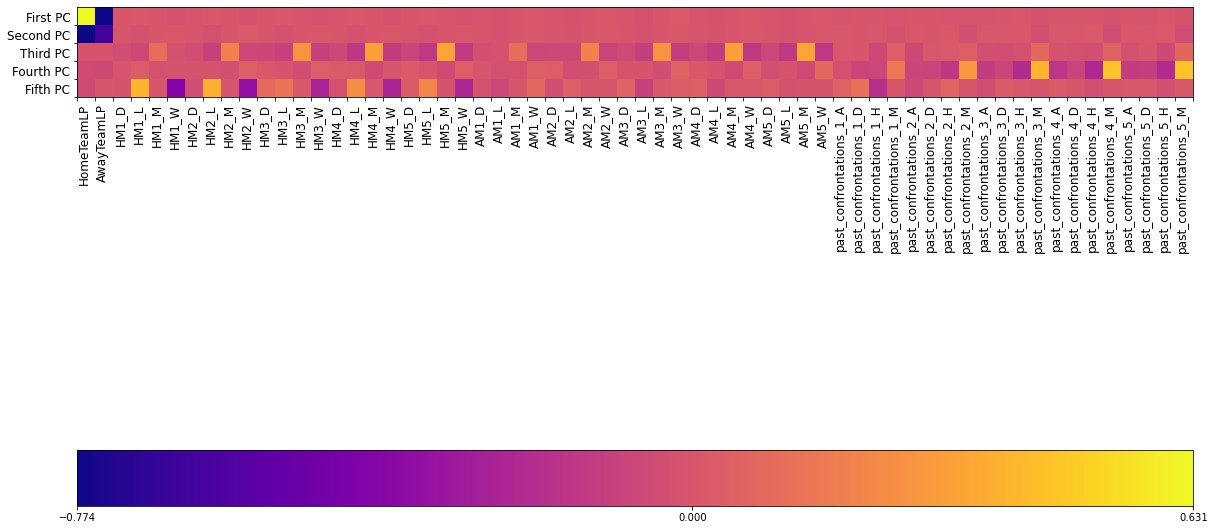

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X_all.columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 5));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC', 'Third PC', 'Fourth PC', 'Fifth PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

If the value is missing, it means that the match does not exist. Thus, the missing values should not have any impact on our process. However, from the table above, you can see that missing values affect our features considerably, especially the third PC and the fourth PC. My next step is to eliminate the impact of missing values.

## 2. Delete four features: HM4, HM5, AM4, AM5

In [52]:
X_all_2 = dataset[['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5', 'HomeTeamLP', 'AwayTeamLP']]
y_all_2 = y_all

In [53]:
X_all_2 = pd.get_dummies(data=X_all_2, columns=['HM1','HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5' ])

In [55]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_all_2, y_all_2,random_state=11)

In [56]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 5)
pca_2.fit(X_train_2)

PCA(n_components=5)

In [57]:
X_train_pca_2 = pca_2.transform(X_train_2)
X_test_pca_2 = pca_2.transform(X_test_2)

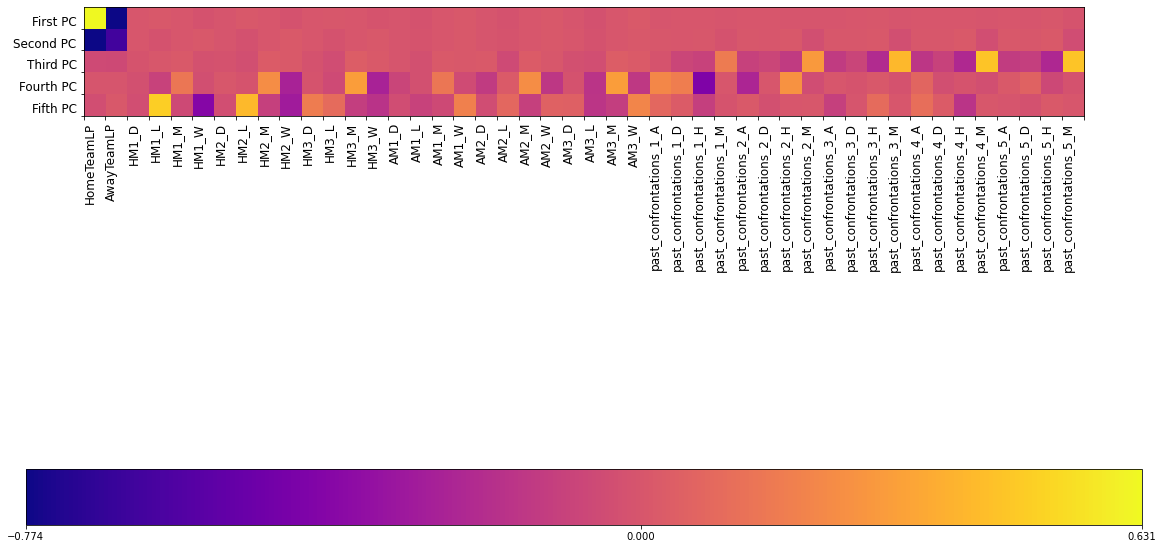

In [58]:
fig_2 = plt.figure(figsize=(20, 10))
plt.imshow(pca_2.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X_all_2.columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 5));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC', 'Third PC', 'Fourth PC', 'Fifth PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca_2.components_.min(), 0, 
                                              pca_2.components_.max()], pad=0.65);

The missing values still exist, this is not the best way to deal with them.

## 3. Delete all the missing columns

In [59]:
X_all.columns

Index(['HomeTeamLP', 'AwayTeamLP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D',
       'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'HM4_D',
       'HM4_L', 'HM4_M', 'HM4_W', 'HM5_D', 'HM5_L', 'HM5_M', 'HM5_W', 'AM1_D',
       'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D',
       'AM3_L', 'AM3_M', 'AM3_W', 'AM4_D', 'AM4_L', 'AM4_M', 'AM4_W', 'AM5_D',
       'AM5_L', 'AM5_M', 'AM5_W', 'past_confrontations_1_A',
       'past_confrontations_1_D', 'past_confrontations_1_H',
       'past_confrontations_1_M', 'past_confrontations_2_A',
       'past_confrontations_2_D', 'past_confrontations_2_H',
       'past_confrontations_2_M', 'past_confrontations_3_A',
       'past_confrontations_3_D', 'past_confrontations_3_H',
       'past_confrontations_3_M', 'past_confrontations_4_A',
       'past_confrontations_4_D', 'past_confrontations_4_H',
       'past_confrontations_4_M', 'past_confrontations_5_A',
       'past_confrontations_5_D', 'past_confrontations_

In [60]:
X_all = X_all[['HomeTeamLP', 'AwayTeamLP', 
               'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 
               'HM3_D', 'HM3_L', 'HM3_W', 'HM4_D', 'HM4_L', 'HM4_W', 
               'HM5_D', 'HM5_L', 'HM5_W', 'AM1_D', 'AM1_L', 'AM1_W', 
               'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 
               'AM4_D', 'AM4_L', 'AM4_W', 'AM5_D', 'AM5_L', 'AM5_W', 
               'past_confrontations_1_A', 'past_confrontations_1_D', 'past_confrontations_1_H',
               'past_confrontations_2_A', 'past_confrontations_2_D', 'past_confrontations_2_H',
               'past_confrontations_3_A', 'past_confrontations_3_D', 'past_confrontations_3_H',
               'past_confrontations_4_A', 'past_confrontations_4_D', 'past_confrontations_4_H',
               'past_confrontations_5_A', 'past_confrontations_5_D', 'past_confrontations_5_H']]

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,random_state=11)

In [62]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components = 5)
pca_3.fit(X_train)

PCA(n_components=5)

In [63]:
X_train_pca_3 = pca_3.transform(X_train)
X_test_pca_3 = pca_3.transform(X_test)

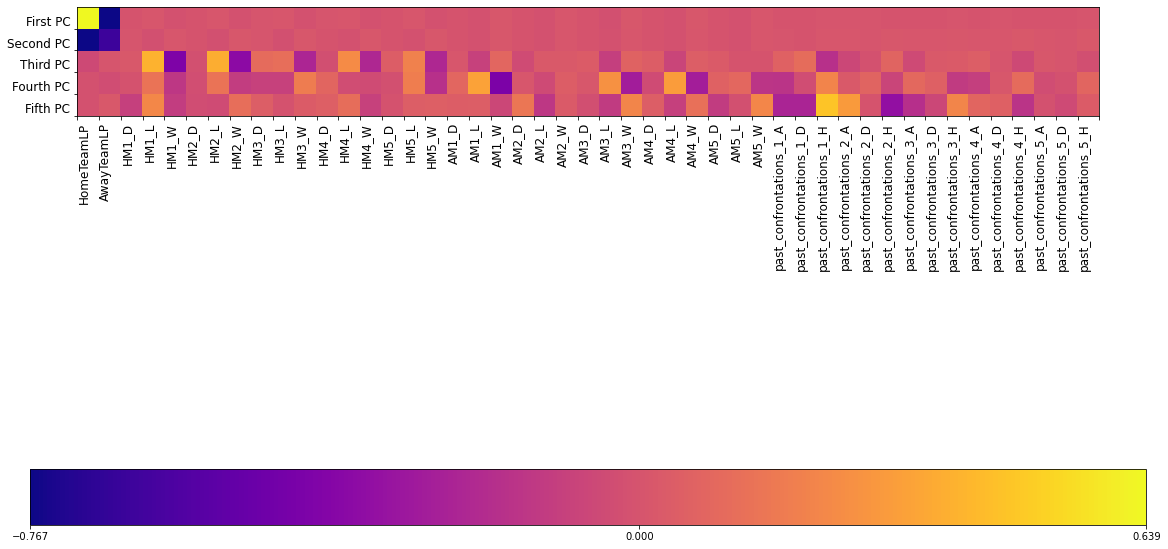

In [64]:
fig_2 = plt.figure(figsize=(20, 10))
plt.imshow(pca_3.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X_all.columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 5));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC', 'Third PC', 'Fourth PC', 'Fifth PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca_3.components_.min(), 0, 
                                              pca_3.components_.max()], pad=0.65);

# Part 5: Dig into the models

## Prepare the matches that need to predict

In [6]:
X_predictions = pd.get_dummies(data=X_predictions, columns=['HM1','HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'past_confrontations_1', 'past_confrontations_2', 'past_confrontations_3', 'past_confrontations_4', 'past_confrontations_5' ])

In [7]:
X_predictions.columns

Index(['HomeTeamLP', 'AwayTeamLP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D',
       'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'HM4_D',
       'HM4_L', 'HM4_M', 'HM4_W', 'HM5_D', 'HM5_L', 'HM5_M', 'HM5_W', 'AM1_D',
       'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D',
       'AM3_L', 'AM3_M', 'AM3_W', 'AM4_D', 'AM4_L', 'AM4_M', 'AM4_W', 'AM5_D',
       'AM5_L', 'AM5_M', 'AM5_W', 'past_confrontations_1_A',
       'past_confrontations_1_D', 'past_confrontations_1_H',
       'past_confrontations_2_A', 'past_confrontations_2_D',
       'past_confrontations_2_H', 'past_confrontations_2_M',
       'past_confrontations_3_A', 'past_confrontations_3_D',
       'past_confrontations_3_H', 'past_confrontations_3_M',
       'past_confrontations_4_A', 'past_confrontations_4_D',
       'past_confrontations_4_H', 'past_confrontations_4_M',
       'past_confrontations_5_A', 'past_confrontations_5_D',
       'past_confrontations_5_H', 'past_confrontations_

In [7]:
X_predictions = X_predictions[['HomeTeamLP', 'AwayTeamLP', 
               'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 
               'HM3_D', 'HM3_L', 'HM3_W', 'HM4_D', 'HM4_L', 'HM4_W', 
               'HM5_D', 'HM5_L', 'HM5_W', 'AM1_D', 'AM1_L', 'AM1_W', 
               'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 
               'AM4_D', 'AM4_L', 'AM4_W', 'AM5_D', 'AM5_L', 'AM5_W', 
               'past_confrontations_1_A', 'past_confrontations_1_D', 'past_confrontations_1_H',
               'past_confrontations_2_A', 'past_confrontations_2_D', 'past_confrontations_2_H',
               'past_confrontations_3_A', 'past_confrontations_3_D', 'past_confrontations_3_H',
               'past_confrontations_4_A', 'past_confrontations_4_D', 'past_confrontations_4_H',
               'past_confrontations_5_A', 'past_confrontations_5_D', 'past_confrontations_5_H']]

## Logistic Regression

Hyperparameter Tuning with GridSearchCV:  
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. It tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [68]:
LR = LogisticRegression()

In [69]:
param_grid = [
    {'penalty': ['l1','l2', 'elasticnet', 'none'],
     'C': np.logspace(-4,4,20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000],
     'class_weight': ['None', 'balanced']
    }
]

For the hyperparameters above please refer to:  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [70]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LR, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [71]:
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1502 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 2956 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4680 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6185 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7694 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed: 10.4min finished


In [72]:
print(best_clf.best_estimator_)
print(best_clf.best_params_)
print(best_clf.best_score_)

LogisticRegression(C=0.012742749857031334, class_weight='balanced',
                   solver='liblinear')
{'C': 0.012742749857031334, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.5194805194805195


In [73]:
predictions = best_clf.predict(X_predictions)
match_predict['LR_predictions'] = predictions

## Desicion Tree

In [74]:
# First I build a preliminary model
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [75]:
for name, importance in zip(X_train.columns, tree.feature_importances_):
    print(name, importance)

HomeTeamLP 0.36315259482442014
AwayTeamLP 0.1531290813554933
HM1_D 0.0
HM1_L 0.0
HM1_W 0.05752997294101265
HM2_D 0.012415387789991099
HM2_L 0.0
HM2_W 0.0
HM3_D 0.0
HM3_L 0.0
HM3_W 0.0
HM4_D 0.0
HM4_L 0.0
HM4_W 0.0
HM5_D 0.0
HM5_L 0.0
HM5_W 0.0
AM1_D 0.0
AM1_L 0.17769512900759774
AM1_W 0.03450036819545543
AM2_D 0.0
AM2_L 0.0
AM2_W 0.0
AM3_D 0.0
AM3_L 0.03929429561869845
AM3_W 0.03829867759539297
AM4_D 0.0
AM4_L 0.0
AM4_W 0.0
AM5_D 0.0
AM5_L 0.036507315114130315
AM5_W 0.0
past_confrontations_1_A 0.0
past_confrontations_1_D 0.0
past_confrontations_1_H 0.0
past_confrontations_2_A 0.0
past_confrontations_2_D 0.04406091419560362
past_confrontations_2_H 0.0
past_confrontations_3_A 0.0
past_confrontations_3_D 0.0
past_confrontations_3_H 0.0
past_confrontations_4_A 0.0
past_confrontations_4_D 0.022373389071150745
past_confrontations_4_H 0.02104287429105356
past_confrontations_5_A 0.0
past_confrontations_5_D 0.0
past_confrontations_5_H 0.0


[Text(837.0, 733.86, 'HomeTeamLP <= 6.5\ngini = 0.647\nsamples = 1617\nvalue = [508, 395, 714]\nclass = H'),
 Text(418.5, 570.78, 'HM1_W <= 0.5\ngini = 0.546\nsamples = 492\nvalue = [78, 112, 302]\nclass = H'),
 Text(209.25, 407.70000000000005, 'AwayTeamLP <= 12.5\ngini = 0.611\nsamples = 251\nvalue = [49, 72, 130]\nclass = H'),
 Text(104.625, 244.62, 'HomeTeamLP <= 2.5\ngini = 0.651\nsamples = 143\nvalue = [36, 46, 61]\nclass = H'),
 Text(52.3125, 81.54000000000008, 'gini = 0.603\nsamples = 49\nvalue = [14, 9, 26]\nclass = H'),
 Text(156.9375, 81.54000000000008, 'gini = 0.652\nsamples = 94\nvalue = [22, 37, 35]\nclass = D'),
 Text(313.875, 244.62, 'HomeTeamLP <= 4.5\ngini = 0.519\nsamples = 108\nvalue = [13, 26, 69]\nclass = H'),
 Text(261.5625, 81.54000000000008, 'gini = 0.397\nsamples = 66\nvalue = [8, 8, 50]\nclass = H'),
 Text(366.1875, 81.54000000000008, 'gini = 0.598\nsamples = 42\nvalue = [5, 18, 19]\nclass = H'),
 Text(627.75, 407.70000000000005, 'AM1_W <= 0.5\ngini = 0.449\ns

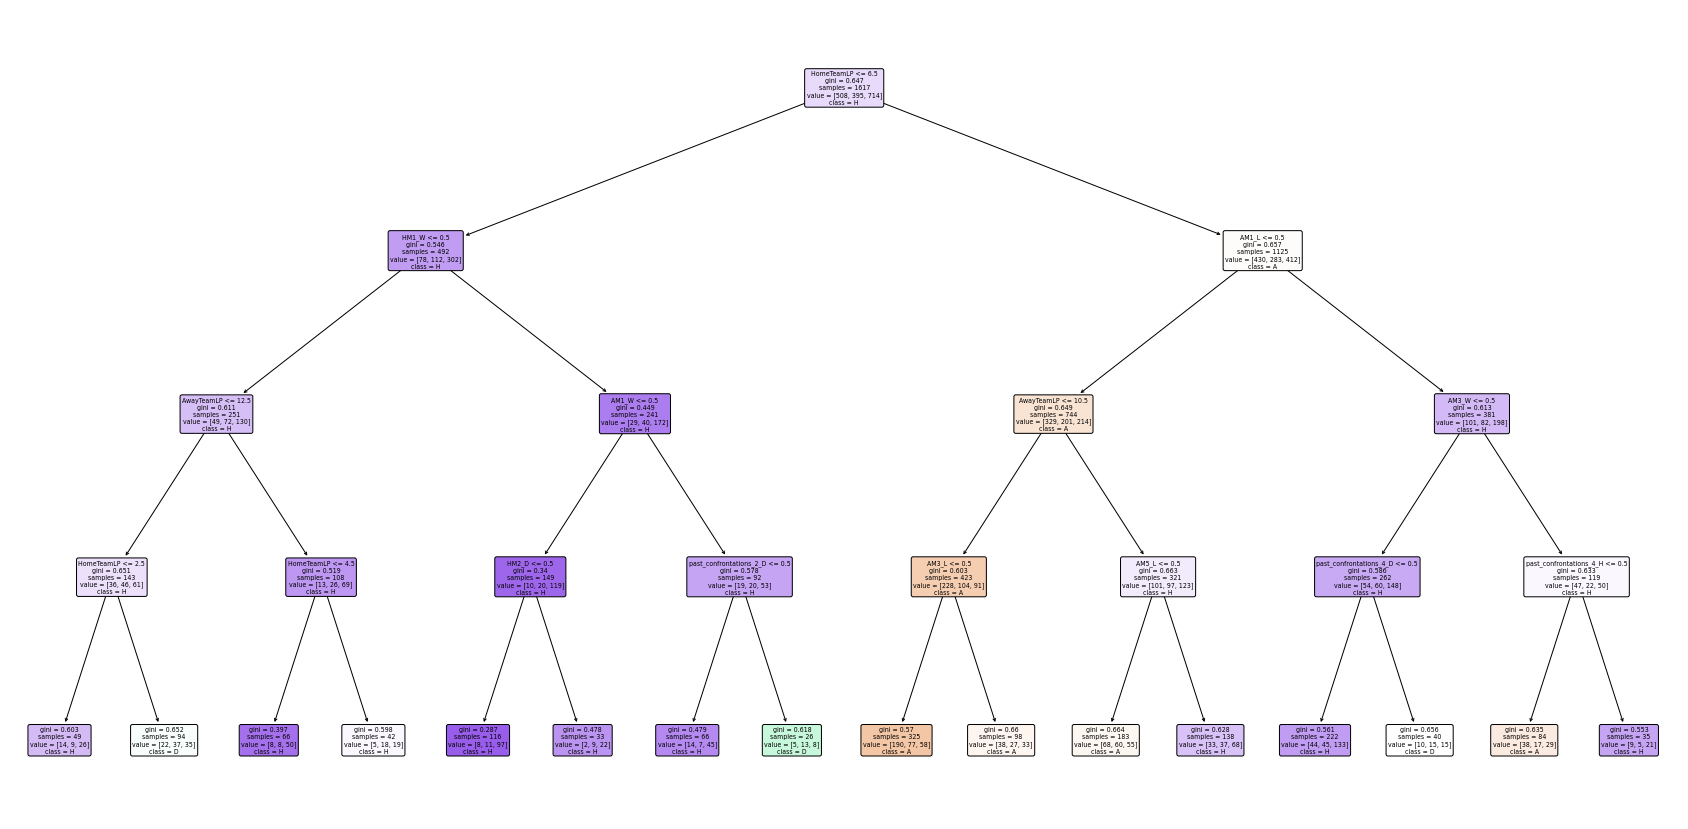

In [76]:
import sklearn
plt.figure(figsize = (30, 15))
sklearn.tree.plot_tree(tree,
                       filled = True,
                       rounded = True,
                       class_names = ["A", "D", "H"],
                       feature_names = X_predictions.columns)

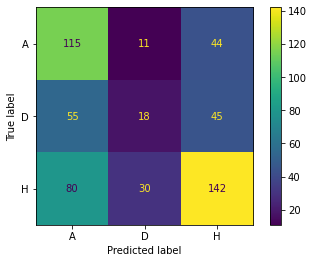

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test, display_labels=['A','D','H'])

## Cost Complexity Pruning 1: Visualize alpha 

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [81]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[-20:-1]

temp = ccp_alphas

trees = []

for ccp_alphas in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas)
    tree.fit(X_train, y_train)
    trees.append(tree)


[0.00185104 0.00185373 0.00185735 0.00190003 0.00190682 0.00194149
 0.0019781  0.00204019 0.00204133 0.00209524 0.00214942 0.00279971
 0.00282474 0.00296334 0.00303932 0.00304038 0.00445136 0.00922695
 0.01374909]


In [83]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

<function matplotlib.pyplot.show(*args, **kw)>

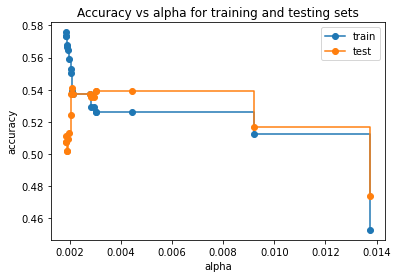

In [85]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(temp, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(temp, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show

In the graph above, we see that the accuracy for the testing dataset hits its maximum value when alpha is about 0.002. After this value for alpha, the accuracy of the Training dataset drops off and that suggests we should set ccp_alpha = 0.002.

## Cost Complexity Pruning 2: Cross Validation For Finding the best Alpha

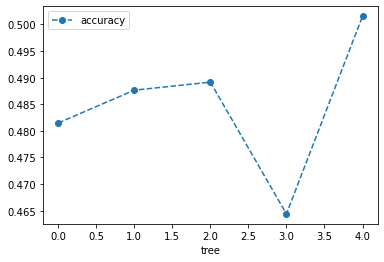

In [86]:
tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.002)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies. So instead of picking a single Training dataset and single Testing dataset, I'll use cross validation to find the optimal value for ccp_alpha.

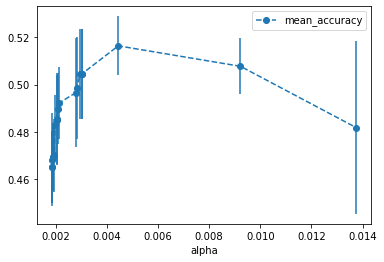

In [89]:
alpha_loop_values = []

for ccp_alpha in temp:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

Using cross validation, we can see that, overall, instead of setting ccp_alpha = 0.002, we need to set it to something closer to 0.0045. We can find the exact value with:

In [90]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.004) & 
                                (alpha_results['alpha'] < 0.006)]['alpha']
ideal_ccp_alpha

16    0.004451
Name: alpha, dtype: float64

In [91]:
## convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.004451357987925203

## Final Decision Tree Model

In [92]:
tree_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=ideal_ccp_alpha)
tree_pruned = tree_pruned.fit(X_train, y_train)

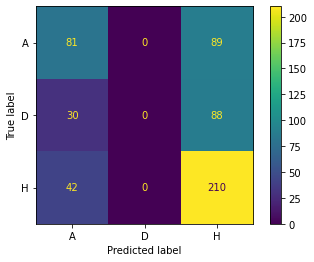

In [93]:
plot_confusion_matrix(tree_pruned,
                      X_test,
                      y_test,
                      display_labels=["A", "D", "H"])

In [102]:
for name, importance in zip(X_train.columns, tree_pruned.feature_importances_):
    print(name, importance)

HomeTeamLP 0.5076557483127039
AwayTeamLP 0.19772057008538407
HM1_D 0.0
HM1_L 0.0
HM1_W 0.0
HM2_D 0.0
HM2_L 0.0
HM2_W 0.0
HM3_D 0.0
HM3_L 0.0
HM3_W 0.0
HM4_D 0.0
HM4_L 0.0
HM4_W 0.0
HM5_D 0.0
HM5_L 0.0
HM5_W 0.0
AM1_D 0.0
AM1_L 0.29462368160191205
AM1_W 0.0
AM2_D 0.0
AM2_L 0.0
AM2_W 0.0
AM3_D 0.0
AM3_L 0.0
AM3_W 0.0
AM4_D 0.0
AM4_L 0.0
AM4_W 0.0
AM5_D 0.0
AM5_L 0.0
AM5_W 0.0
past_confrontations_1_A 0.0
past_confrontations_1_D 0.0
past_confrontations_1_H 0.0
past_confrontations_2_A 0.0
past_confrontations_2_D 0.0
past_confrontations_2_H 0.0
past_confrontations_3_A 0.0
past_confrontations_3_D 0.0
past_confrontations_3_H 0.0
past_confrontations_4_A 0.0
past_confrontations_4_D 0.0
past_confrontations_4_H 0.0
past_confrontations_5_A 0.0
past_confrontations_5_D 0.0
past_confrontations_5_H 0.0


[Text(669.6, 713.475, 'HomeTeamLP <= 6.5\ngini = 0.647\nsamples = 1617\nvalue = [508, 395, 714]\nclass = H'),
 Text(334.8, 509.625, 'gini = 0.546\nsamples = 492\nvalue = [78, 112, 302]\nclass = H'),
 Text(1004.4000000000001, 509.625, 'AM1_L <= 0.5\ngini = 0.657\nsamples = 1125\nvalue = [430, 283, 412]\nclass = A'),
 Text(669.6, 305.775, 'AwayTeamLP <= 10.5\ngini = 0.649\nsamples = 744\nvalue = [329, 201, 214]\nclass = A'),
 Text(334.8, 101.92499999999995, 'gini = 0.603\nsamples = 423\nvalue = [228, 104, 91]\nclass = A'),
 Text(1004.4000000000001, 101.92499999999995, 'gini = 0.663\nsamples = 321\nvalue = [101, 97, 123]\nclass = H'),
 Text(1339.2, 305.775, 'gini = 0.613\nsamples = 381\nvalue = [101, 82, 198]\nclass = H')]

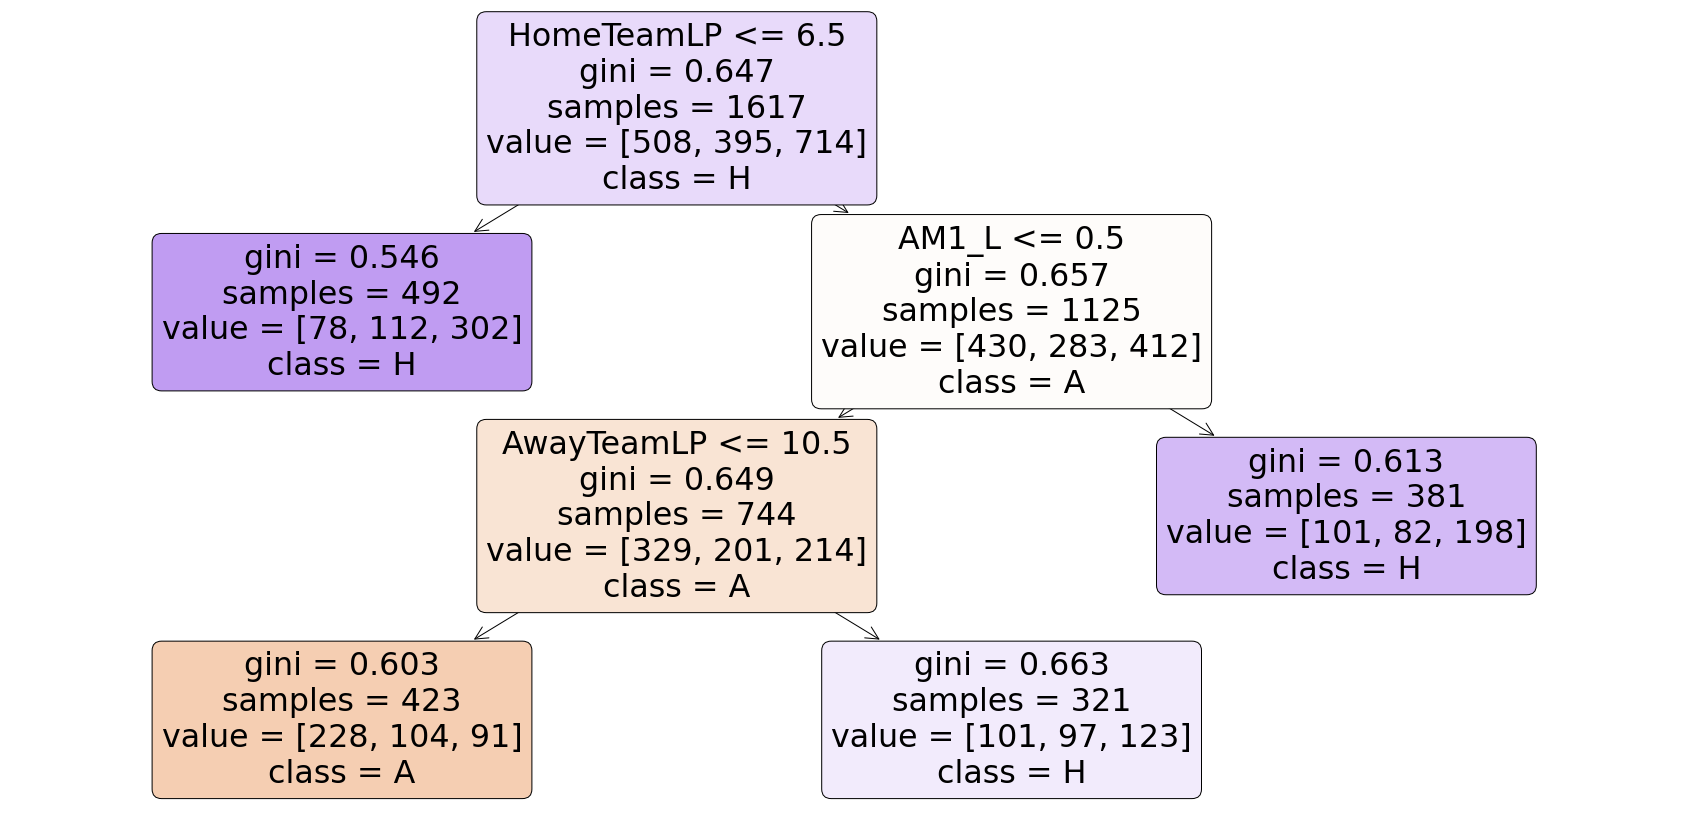

In [94]:
plt.figure(figsize = (30, 15))
sklearn.tree.plot_tree(tree_pruned,
                       filled = True,
                       rounded = True,
                       class_names = ["A", "D", "H"],
                       feature_names = X_predictions.columns)

In [95]:
tree_predictions = tree_pruned.predict(X_predictions)
match_predict['Tree_predictions'] = tree_predictions

## XGboost 

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. It is an implementation of gradient boosted decision trees designed for speed and performance.  
For more information please refer to this link:  
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [9]:
# Build a preliminary model
import xgboost as xgb 
xgb = xgb.XGBClassifier(objective = 'multi:softmax', missing=None, seed = 42)
xgb.fit(X_train, y_train,
        verbose=True,
        early_stopping_rounds=50,
        eval_metric='merror',
        eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.47407
[1]	validation_0-merror:0.48333
[2]	validation_0-merror:0.47963
[3]	validation_0-merror:0.48148
[4]	validation_0-merror:0.46852
[5]	validation_0-merror:0.48518
[6]	validation_0-merror:0.49074
[7]	validation_0-merror:0.48518
[8]	validation_0-merror:0.49259
[9]	validation_0-merror:0.49259
[10]	validation_0-merror:0.50556
[11]	validation_0-merror:0.49815


C:\Users\WANGKEROU\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-merror:0.49259
[13]	validation_0-merror:0.49815
[14]	validation_0-merror:0.49630
[15]	validation_0-merror:0.49444
[16]	validation_0-merror:0.49815
[17]	validation_0-merror:0.49630
[18]	validation_0-merror:0.49815
[19]	validation_0-merror:0.49259
[20]	validation_0-merror:0.48704
[21]	validation_0-merror:0.49815
[22]	validation_0-merror:0.52037
[23]	validation_0-merror:0.50741
[24]	validation_0-merror:0.50741
[25]	validation_0-merror:0.50741
[26]	validation_0-merror:0.51667
[27]	validation_0-merror:0.51482
[28]	validation_0-merror:0.52037
[29]	validation_0-merror:0.51852
[30]	validation_0-merror:0.51111
[31]	validation_0-merror:0.50926
[32]	validation_0-merror:0.50741
[33]	validation_0-merror:0.51111
[34]	validation_0-merror:0.51482
[35]	validation_0-merror:0.52037
[36]	validation_0-merror:0.52407
[37]	validation_0-merror:0.52037
[38]	validation_0-merror:0.51667
[39]	validation_0-merror:0.51852
[40]	validation_0-merror:0.51667
[41]	validation_0-merror:0.51667
[42]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

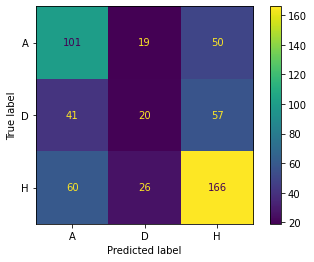

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,
                      X_test, y_test,
                      values_format='d',
                      display_labels=['A', 'D', 'H'])

## Optimize Parameters using  RandomizedSearchCV & GridSearchCV

Random Search, another way to tune the hyper parameters, sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources.

In [120]:
params = {
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'gamma':[0, 0.25, 0.4, 0.6, 0.8, 1.0],
    'reg_lambda':[0, 1.0, 10.0],
    'min_child_weight':[1, 3, 5, 7],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7, 1.0],
    'scale_pos_weight':[1, 3, 5]
}

To learn more about the hyper parameters please refer to this link:  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [121]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)

In [122]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   34.8s finished
C:\Users\WANGKEROU\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=None,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_p...
                                           seed=42, subsample=1,
                                           tree_method='exact',
       

In [124]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=5, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
random_search.best_params_

{'scale_pos_weight': 5,
 'reg_lambda': 10.0,
 'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 1.0,
 'colsample_bytree': 0.5}

The problem with Random Search is that everytime I run the codes, it gives me completely different results. In order to get the most accurate value, I go back to GridSearchCV.

In [126]:
params = {
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'gamma':[0, 0.25, 0.4, 0.6, 0.8, 1.0],
    'reg_lambda':[0, 1.0, 10.0],
    'min_child_weight':[1, 3, 5, 7],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7, 1.0],
    'scale_pos_weight':[1, 3, 5]
}

In [130]:
grid_search = GridSearchCV(xgb, param_grid=params, n_jobs=-1, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

[15:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=None,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_paralle...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, seed=42,
                                     subsample=1, tree_method='exact',
                        

In [131]:
grid_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 1.0,
 'max_depth': 3,
 'min_child_weight': 5,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [8]:
import xgboost as xgb 
xgb_clf = xgb.XGBClassifier(objective = 'multi:softmax', 
                        learning_rate = 0.05,
                        colsample_bytree = 0.3,
                        gamma = 1.0,
                        max_depth = 3,
                        min_child_weight = 5,
                        reg_lambda = 10.0,
                        scale_pos_weight = 1)

In [10]:
xgb_clf.fit(X_train, y_train)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on testing set: {:.2f}'
     .format(xgb_clf.score(X_test, y_test)))

C:\Users\WANGKEROU\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on training set: 0.57
Accuracy of XGBoost classifier on testing set: 0.57


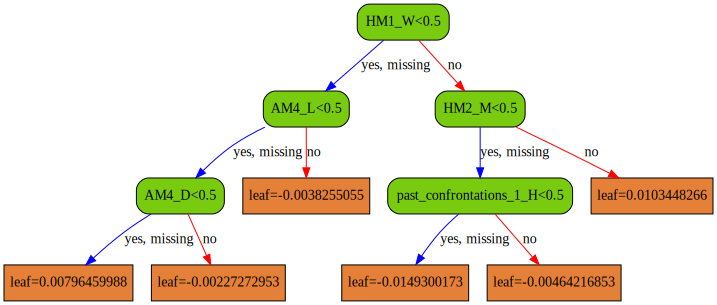

In [11]:
# Visualize the final model
import graphviz
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(xgb_clf, num_trees=0, size = '10,10',
                condition_node_params = node_params,
                leaf_node_params = leaf_params)

In each node we have:
The variable(column name) and the threshold for splitting the observations.  
Leaf tells us the output value for each leaf.

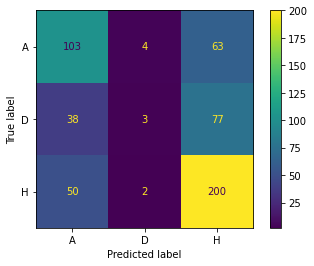

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf,
                      X_test, y_test,
                      values_format='d',
                      display_labels=['A', 'D', 'H'])

In [141]:
xgb_predictions = xgb_clf.predict(X_predictions)
match_predict['xgb_predictions'] = xgb_predictions

In [144]:
match_predict.to_csv("Final Predictions.csv")

# Part 6: Summary

1. Football is something hard to predict, EPL is even harder.
2. The quality of inputs is poor, the future performance does not 100% relate to the past.
3. The predicted games are the last few games of this season, the top teams have shifted their focus to the Champions League, the teams at the bottom will try their best to stay in the first division. Mid-range teams become numb.
4. The models prefer to work with binary class instead of multi-class classification. If I turn the result to 'Win' or 'Not win', I believe the outcome will be much better.  
...